In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from allison.linear_models.logistic_regression import LogisticRegression
from allison.utils.functions.loss import binary_cross_entropy
from allison.utils.functions.activation import sigmoid
from allison.utils.metrics import accuracy,predict_labels
from allison.utils.functions.data import train_test_split

In [3]:
data=pd.read_csv("../data/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['labels']=data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
data=data[data['labels']<2]
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


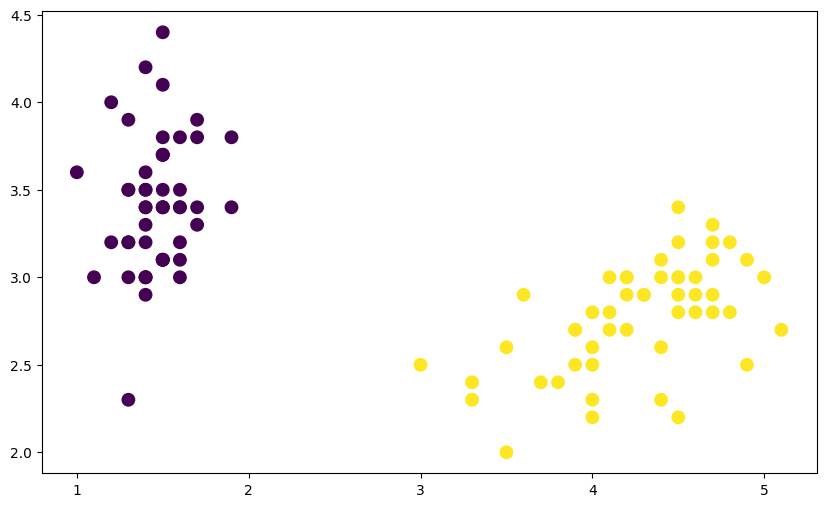

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(data['PetalLengthCm'],data['SepalWidthCm'],s=80,c=data['labels'] )

In [6]:
X=data[['PetalLengthCm','SepalWidthCm']]
y=data['labels']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [18]:
model=LogisticRegression()

model.optimizers(loss_function=binary_cross_entropy,
                 metric=accuracy,
                 learning_rate=0.001)
model.train(X_train,y_train,n_iters=20,history_train=True)

Iter:	2	==================================================>	 binary_cross_entropy: 140.327	 accuracy: 47.50% 

Iter:	4	==================================================>	 binary_cross_entropy: 110.082	 accuracy: 47.50% 

Iter:	6	==================================================>	 binary_cross_entropy: 83.855	 accuracy: 47.50% 

Iter:	8	==================================================>	 binary_cross_entropy: 63.792	 accuracy: 47.50% 

Iter:	10	==================================================>	 binary_cross_entropy: 51.340	 accuracy: 47.50% 

Iter:	12	==================================================>	 binary_cross_entropy: 45.620	 accuracy: 48.75% 

Iter:	14	==================================================>	 binary_cross_entropy: 43.919	 accuracy: 83.75% 

Iter:	16	==================================================>	 binary_cross_entropy: 43.797	 accuracy: 98.75% 

Iter:	18	==================================================>	 binary_cross_entropy: 44.047	 accuracy: 98.75% 

Ite

In [8]:
history=model.history_train
history

{'iter': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'loss': [147.86984357391808,
  112.40747032960877,
  82.55473083018992,
  63.01736414422695,
  55.51330434364995,
  54.51046928208547,
  54.86599002071876,
  55.164098160456135,
  55.308386665893366,
  55.369416223128596],
 'precision': [47.5, 47.5, 47.5, 47.5, 47.5, 47.5, 93.75, 52.5, 52.5, 52.5],
 'params': [{'bias': array([0.1988424]),
   'weights': array([0.71134195, 0.79017554])},
  {'bias': array([0.14008881]), 'weights': array([0.54808039, 0.60737841])},
  {'bias': array([0.08369141]), 'weights': array([0.39136614, 0.43191203])},
  {'bias': array([0.03188375]), 'weights': array([0.24740558, 0.27072542])},
  {'bias': array([-0.00982109]), 'weights': array([0.13151826, 0.14097123])},
  {'bias': array([-0.03614086]), 'weights': array([0.0583822 , 0.05908385])},
  {'bias': array([-0.04911142]), 'weights': array([0.02234027, 0.01872921])},
  {'bias': array([-0.05467418]), 'weights': array([0.00688275, 0.00142207])},
  {'bias': array([-0

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))


# Update function for the animation
def update(i):
    ax.clear()  # Clear the axis

    model.bias = history['params'][i]['bias']
    model.weights = history['params'][i]['weights']


    ax.scatter(X_train['PetalLengthCm'], 
               X_train['SepalWidthCm'], s=80, 
               c=model.predict(X_train))
    
    if i > 0:
    
        ax.title.set_text(f"Iteration: {history['iter'][i-1]}, Loss: {history['loss'][i-1]:.2f}, Accuracy: {history['precision'][i-1]:.2f}%")


plt.close()

# Create the animation
ani = FuncAnimation(fig, update, frames=len(history['params']), repeat=False,interval=1000)
# Display the animation
HTML(ani.to_jshtml())

In [19]:
model


        model: LogisticRegression 

        bias: [0.65632681] 

        weights: [ 0.13136251 -0.35522082] 

        features_names: ['PetalLengthCm', 'SepalWidthCm'] 

        

In [13]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
model.evaluate(X_test,y_test)

40.0

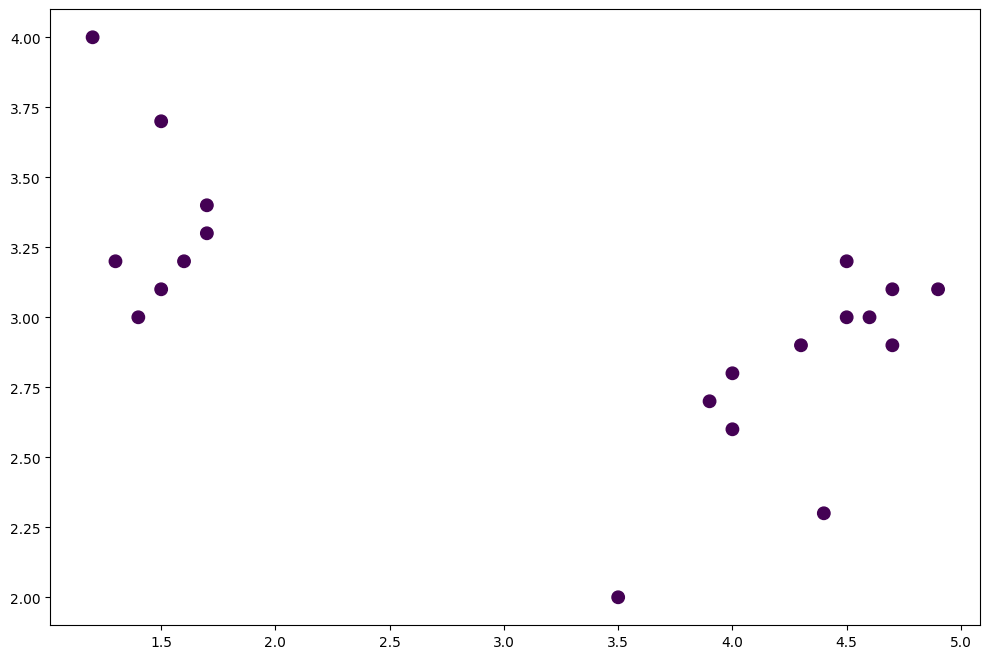

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(X_test['PetalLengthCm'],X_test['SepalWidthCm'],s=80,c=model.predict(X_test))